# Arctic Project in Random Forest (Testing)

## Import libraries

In [1]:
library(MASS)
library(tidyverse)
library(randomForest)

── Attaching packages ──────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ─────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




## Load data

In [2]:
arctic <- read.csv("arctic_data.csv",stringsAsFactors = F)

## Data segmentation

In [3]:
folds <- cut(seq(1,nrow(arctic)), breaks = 10, labels = FALSE) 

## Prediction

In [4]:
prediction <- as.data.frame(
    # loop 1:K
    sapply(1:10, FUN = function(i){
        testID <- which(folds == i, arr.ind = TRUE)
        test <- arctic[testID, ]
        train <- arctic[-testID, ] # set K-fold

        # print(test) # if needed

        # random forest (mtry = 5 and ntree = 200)
        model <- randomForest(Area~Rainfall+Daylight+Population+CO2+Ozone
                              +OceanTemperature_NorthernHemisphere
                              +LandTemperature_NorthernHemisphere
                              +MinTemperature_NorthSlopeAlaska
                              +GDP_WORLD,
                              data=train, mtry=5, ntree=200)

        # print(summary(model)) # if needed

        # prediction output
        predict(model,test)
    })
)

## Table gathering and merging

In [5]:
pred_gather <- gather(data=prediction, key="fold",value="prediction",1:10)
result <- as.data.frame(cbind(arctic[,c(1,5)],pred_gather))

## Calculate Mean Squre Error

In [6]:
result["R^2"] <- ((result$Area-result$prediction)^2)
mse <- sum(result$`R^2`)/490
print(mse)

[1] 0.001465127


## Plot line chart (Prediction vs True)

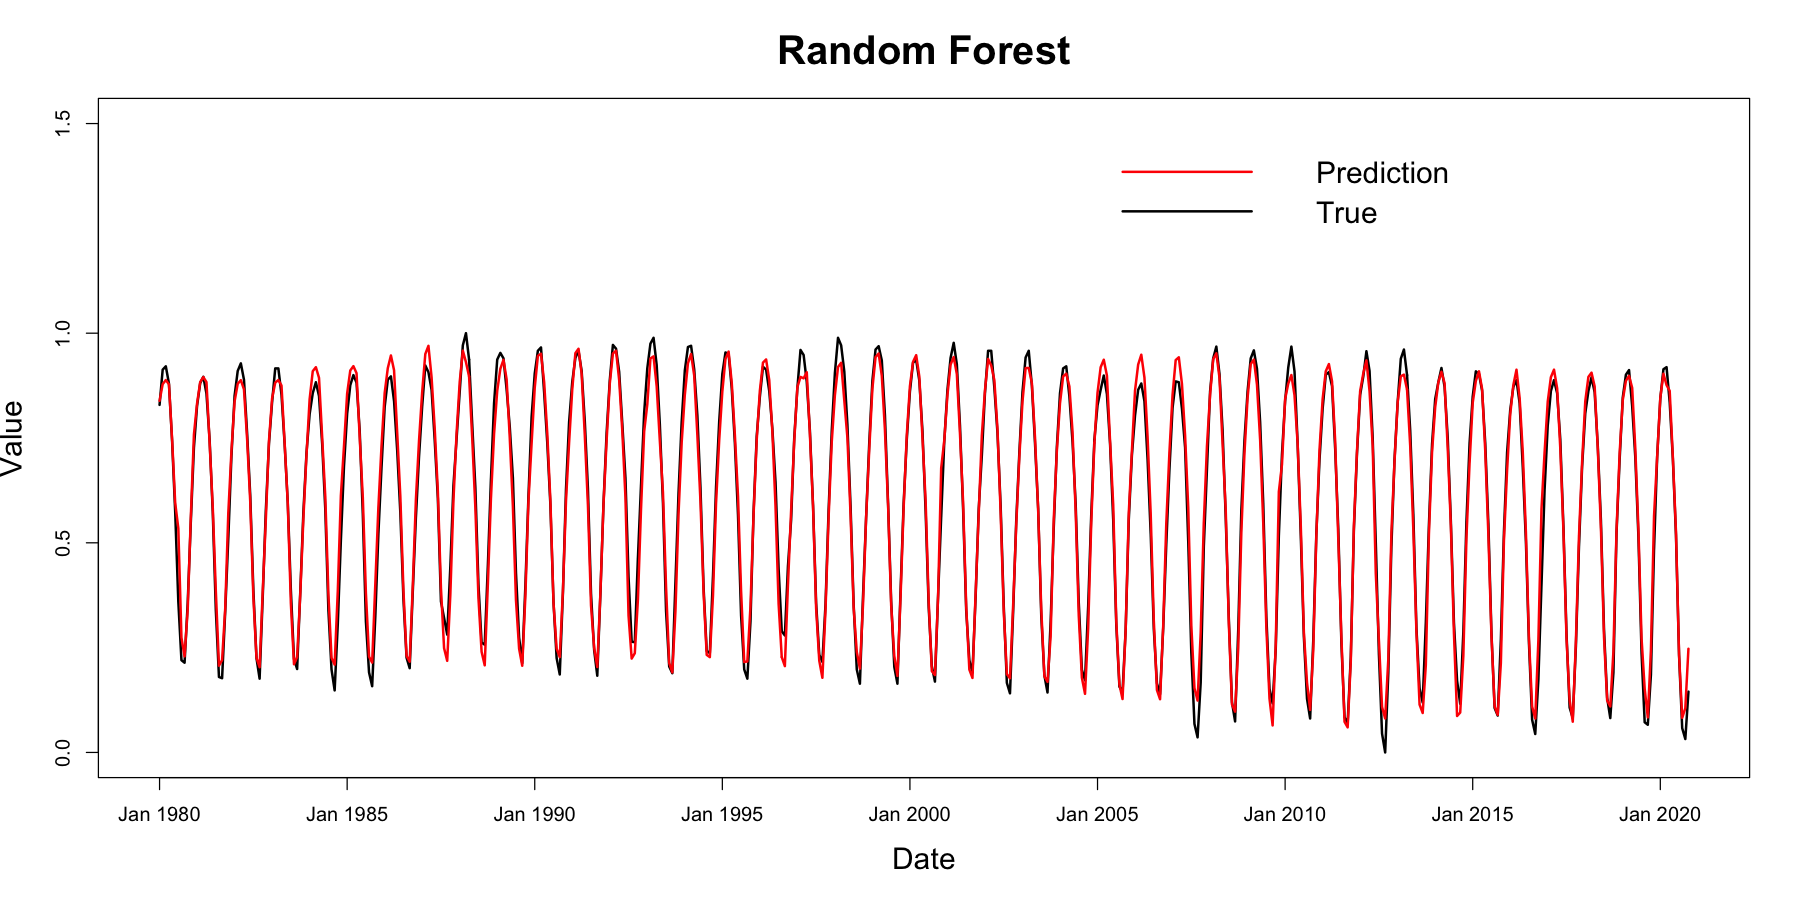

In [7]:
# figure size
options(repr.plot.width=15, repr.plot.height=7.5)

# plot
plot(result$observation,result$Area,type ='l',ylim = c(0,1.5),lwd = '2',
     xlab = "Date", ylab = "Value",xaxt='n',cex.lab = 1.5)

# attributes of prediction lines
lines(result$observation,result$prediction,lty=1,col='red',lwd = '2')

# x-axis labels
axis(1,at=c(1,61,121,181,241,301,361,421,481),
   labels=c("Jan 1980","Jan 1985","Jan 1990","Jan 1995","Jan 2000","Jan 2005","Jan 2010","Jan 2015","Jan 2020"))

# title
title(main = list("Random Forest", cex = 2, col = "black", font = 2))

# legend
legend("topright",inset=.05,c("Prediction","True"),
       bty = 'n',lty=c(1, 1),col=c("red", "black"),lwd =c(2, 2),cex = 1.5)

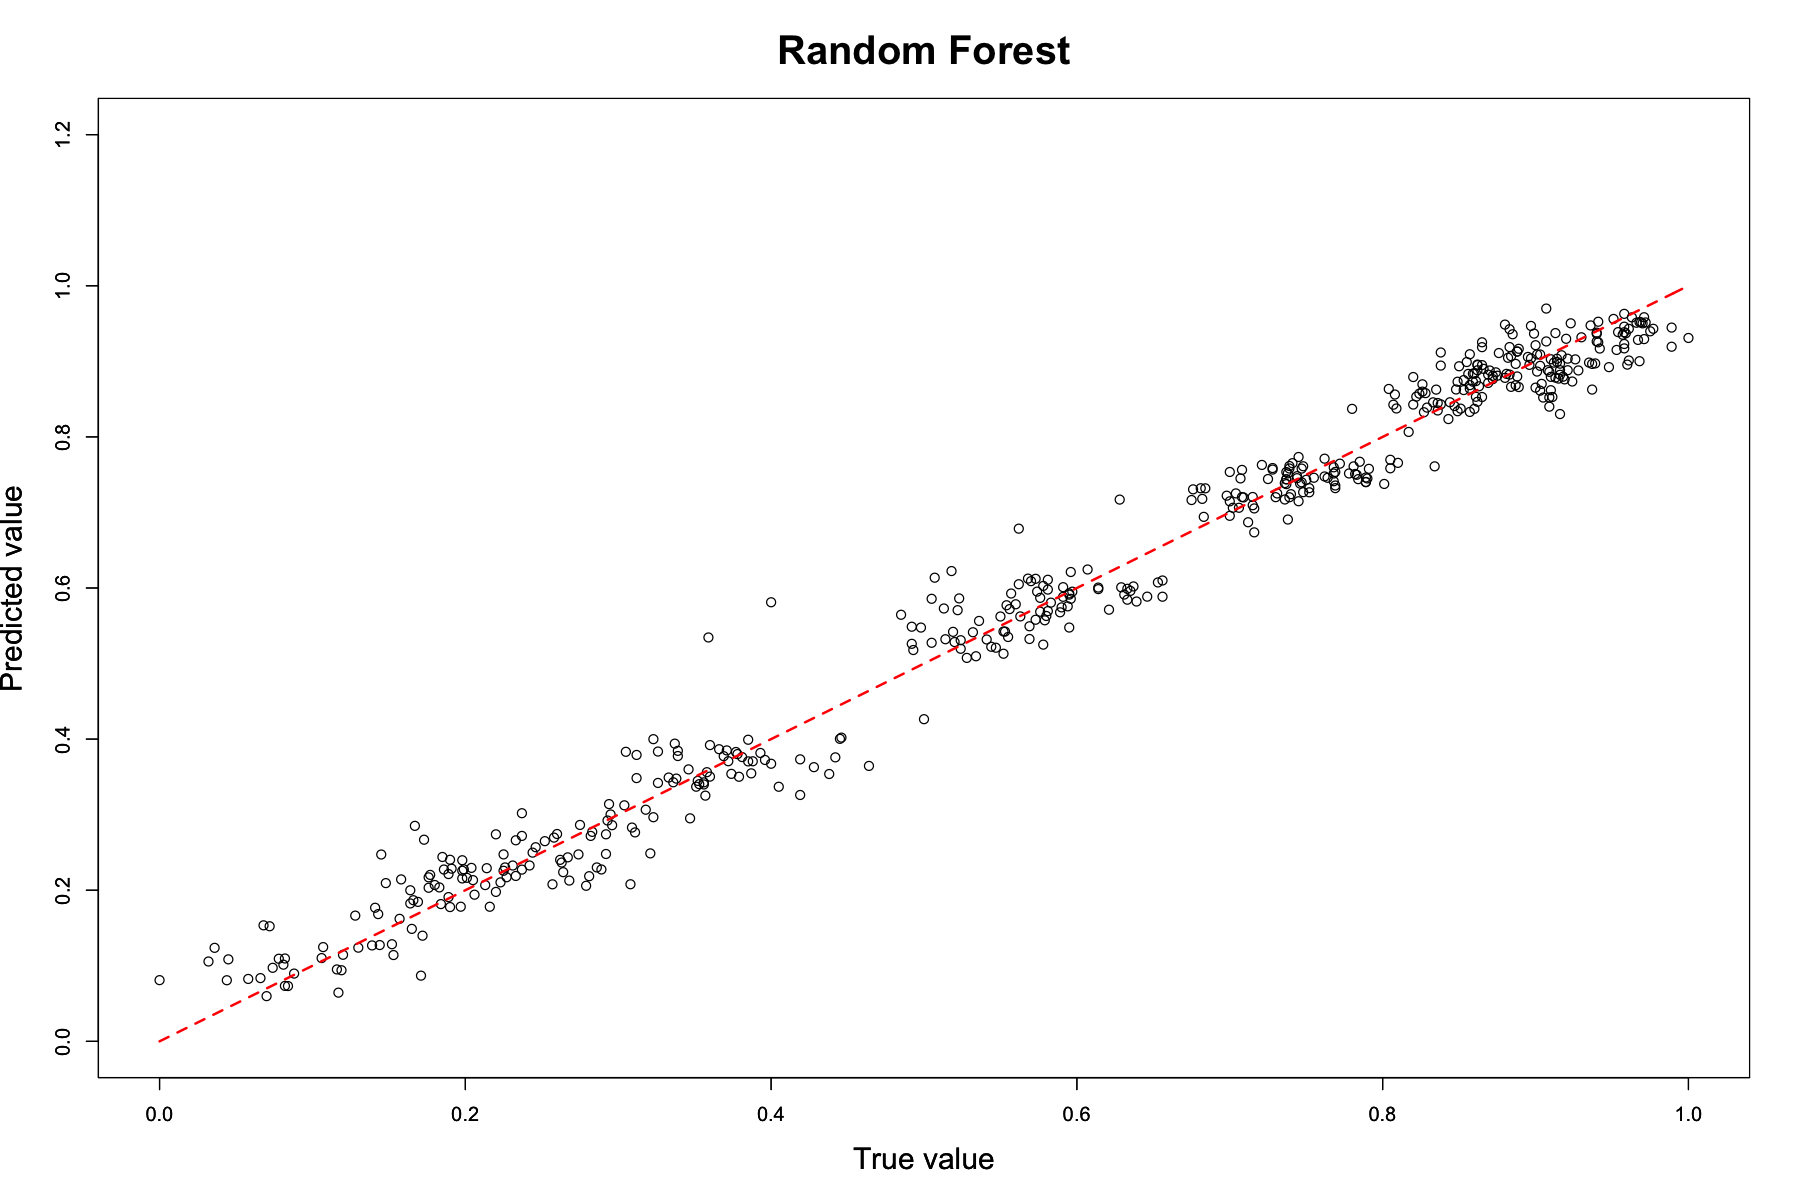

In [8]:
# figure size
options(repr.plot.width=15, repr.plot.height=10)

plot(result$Area, result$prediction,xlim = c(0,1.0), ylim = c(0,1.2),
     xlab = "True value", ylab = "Predicted value",cex.lab = 1.5)
par(new = TRUE)
curve(x+0,0,1,bty="l",xlim = c(0,1.0), ylim = c(0,1.2),
      col=c("red"),lwd =c(2),lty=c(2),xlab = "True value", ylab = "Predicted value",cex.lab=1.5)
# title
title(main = list("Random Forest", cex = 2, col = "black", font = 2))